## 分析A/B测试结果

## 目录
- [简介](#intro)
- [I - 概率](#probability)
- [II - A/B 测试](#ab_test)
- [III - 回归](#regression)


<a id='intro'></a>
### 简介

A/B 测试是数据分析师和数据科学家需要经常完成的工作，非常重要。

本项目设定了一家电子商务网站运行 A/B 测试的情境。你的目标是通过这个项目来帮助公司分析和决定他们是否应该使用新的页面，保留旧的页面，或者应该将测试时间延长，之后再做出决定。


<a id='probability'></a>
#### I - 概率

先导入数据。

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` 导入 `ab_data.csv` 数据，并将其存储在 `df` 中。  你可以直接进行以下问题的回答，或者 **做教室里的测试 1** 。

a. 导入数据集，查看前几行数据：

In [2]:
df=pd.read_csv('ab_data.csv')

b. 查看数据集的行数。

In [3]:
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


c. 查看数据集中的用户数量（不同的user_id数）。

In [4]:
n=df['user_id'].nunique()
n=df['user_id'].count()
print(n)

294478


d. 转化用户的占比。

In [5]:
cd = df['converted'].sum()
print(cd)
p = round(cd / n,5)
print(p)

35237
0.11966


e. 请计算数据中 `new_page` 与 `treatment` 不匹配的次数。提示：在一个合理的实验设计里，控制组(control) 应该对应旧页面(old_page)，实验组(treatment) 对应新页面(new_page)。

In [6]:
df[(df['group']=='control')&(df['landing_page']!='old_page')].shape[0]+df[(df['group']=='treatment')&(df['landing_page']!='new_page')].shape[0]

3893


f. 是否有任何行空缺数值？

In [7]:
df.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
dtype: int64

`2.` 对于 **treatment** 和 **new_page** 不匹配的行或 **control** 与 **old_page** 不匹配的行，我们不能确定该行是否接收到了新页面还是旧页面。 

a. 去创建一个符合要求的新数据集。将新 dataframe 存储在 **df2** 中。

In [8]:

df2=df[(df['group']=='control')&(df['landing_page']=='old_page')].append(df[(df['group']=='treatment')&(df['landing_page']=='new_page')])

In [9]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

In [10]:
df2.info()
df2.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 290585 entries, 0 to 294477
Data columns (total 5 columns):
user_id         290585 non-null int64
timestamp       290585 non-null object
group           290585 non-null object
landing_page    290585 non-null object
converted       290585 non-null int64
dtypes: int64(2), object(3)
memory usage: 13.3+ MB


,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1
5,936923,2017-01-10 15:20:49.083499,control,old_page,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0


`3.` 根据 **df2** 来回答以下问题。

a.  **df2** 中的用户数量（不同的 **user_id**) ?

In [11]:
df2['user_id'].nunique()

290584

b.  **df2** 中有一个重复的 **user_id** 。它是什么？

In [12]:
df2[df2['user_id'].duplicated()==True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. 这个重复  **user_id** 的行信息是什么？

In [13]:
df2.query('user_id=="773192"')

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0





d. 删除一行重复行，但仍然存储 dataframe 为 **df2**。

In [14]:
df2=df2.drop_duplicates(['user_id'])

`4.` 使用优化过的 **df2** 来回答以下问题，或者做 **测试 4**。

a. 用户成功转化的整体概率是多少？（不分旧页面或者新页面）

In [15]:
p=round(df2['converted'].sum()/df2['user_id'].nunique(),5)
print(p)

0.1196


b. `control` 组用户的转化率是多少？

In [16]:
df2_control= df2.query('group=="control"')
p_c=round(df2_control['converted'].sum() / df2_control['user_id'].nunique(),5)
print(p_c)

0.12039


c. `treatment` 组用户的转化率是多少？

In [17]:
df2_treatment= df2.query('group=="treatment"')
p_t=round(df2_treatment['converted'].sum() / df2_treatment['user_id'].nunique(),5)
print(p_t)

0.11881


d. 一个用户收到新页面的概率是多少？

In [18]:
new=df2[df2['landing_page']=='new_page'].shape[0]
print(new)
p_n=round(new/df2['user_id'].nunique(),2)
print(p_n)

145310
0.5


e. 分析小结，你是否认为有足够的数据支持来证明旧页面或者新页面可以带来更高的转化率？


从数据看确实旧页面的转化率为0.12039略大于新页面0.11881，且用户接收到新页面的概率为0.5，说明接收新旧页面的概率相当，不能得出那个页面转化率更高。

<a id='ab_test'></a>
### II - A/B 测试

因为每个事件都对应有一个时间记录（time stamp 时间戳），所以技术上你可以实现每次观察都连续运行假设检验。

然而，问题的难点在于，什么时候停止你的试验：是在发现其中一组的试验效果足够好时立即停止？还是在这样的观察结果又持续发生了一段时间再停止？需要运行多长时间才能确认两个页面没有带来用户转化率的显著差异？

这些问题是 A/B 测试中最难的部分。如果你对下面提到的一些知识点比较生疏，请先回顾课程中的“描述统计学”部分的内容。

`1.` 现在，你需要根据我们提供的数据做出决策：除非在一类错误为5%以内的前提下新页面被证明更好，你将认定旧页面效果更佳。基于此，你的零假设和备择假设是什么？ 

零假设：**$p_{old}$** ≧ **$p_{new}$** ，备择假设： **$p_{old}$** < **$p_{old}$**

`2.` 假定在零假设中，不管是新页面还是旧页面， $p_{new}$ 与 $p_{old}$ 都有相同的转化成功的概率，也就是说，  $p_{new}$ 与 $p_{old}$ 是相等的。此外，我们还假设它们都等于**ab_data.csv** 中的 **转化率(converted)**。  <br>

现在，在新旧页面上执行抽样分布，并计算 **转化(converted)** 差异。记住，每个页面的样本大小要与 **ab_data.csv** 相同。计算零假设中10000次迭代计算的估计值。  <br>

使用下面的单元格提供这个模拟试验的内容。如果不太理解如何进行模拟，不要担心，你可以通过回答下面的问题来理清思路。同时，你可以在教室里的 **测试 5** 里验证你的答案是否正确。<br>

a. 在零假设中，$p_{new}$ **转化率** 是多少？

In [19]:
p_new = df2['converted'].mean()
print(p_new)

0.119597087245


b. 在零假设中， $p_{old}$ **转化率** 是多少？ 

In [20]:
p_old = df2['converted'].mean()
print(p_old)

0.119597087245


c.  $n_{new}$ 是多少？

In [21]:
n_new = df2[df2['group']=='treatment'].shape[0]
print(n_new)

145310


d.  $n_{old}$?是多少？

In [22]:
n_old = df2[df2['group']=='control'].shape[0]
print(n_old)

145274


e. 在零假设中，使用 $p_{new}$ （新页面的转化率）模拟 $n_{new}$ 个新页面的转化，并将这些 $n_{new}$ 个 1 和 0 存储在 **new_page_converted** 中。

In [23]:
new_page_converted = np.random.choice([0,1],size=n_new,p=[p_new,(1-p_new)])
new_page_converted

array([1, 1, 1, ..., 1, 1, 1])

f. 在零假设中，使用 $p_{old}$ （旧页面的转化率）模拟 $n_{old}$ 个旧页面的转化，并将这些  $n_{old}$ 个 1 和 0 存储在 **old_page_converted** 中。

In [24]:
old_page_converted = np.random.choice([0,1],size=n_old,p=[p_old,(1-p_old)])
old_page_converted

array([1, 1, 1, ..., 1, 1, 1])

g. 根据 e 和 f，计算 $p_{new}$ 和 $p_{old}$ 的差异值（$p_{new}$ - $p_{old}$）。

In [25]:
new_page_converted.mean()-old_page_converted.mean()

-0.00054196254825755741

h. 由于单个数值不能形成分布图形，请参考以上a-g的过程，模拟 10,000 个 $p_{new}$ 与 $p_{old}$ 差异值（$p_{new}$ - $p_{old}$），将这 10,000 个值存储在 **p_diffs** 中。

In [26]:
p_diffs = []
for _ in range(10000):
    old_page_converted = np.random.choice([0,1],size=n_old,p=[p_old,(1-p_old)])
    new_page_converted = np.random.choice([0,1],size=n_old,p=[p_new,(1-p_new)])
    p_diffs.append(new_page_converted.mean()-old_page_converted.mean())

In [27]:
p_diffs

[-0.00048873163814588949,
 -0.0011289012486749295,
 2.0650632597818408e-05,
 -0.00098434682049086675,
 0.0017759544034032793,
 -0.0013354075746520033,
 0.0017484202266063731,
 0.0011564354254718356,
 -0.00039236201935655135,
 -0.0028635543868826829,
 -0.00059886834533362521,
 -9.6369618789227118e-05,
 -0.0011357847928741283,
 -0.00088797720170163963,
 0.00064016961052903998,
 0.0017484202266062621,
 -0.0013835923840467279,
 -0.0010600658066824975,
 0.0021132480691659072,
 -0.00011702025138704553,
 0.00015143797238315049,
 0.00077784049451379289,
 -8.2602530390829543e-05,
 -0.00045431391714967351,
 -0.0022371518647521516,
 0.001514379723832171,
 0.00035794429836033537,
 9.6369618789227118e-05,
 0.0001583215165824603,
 0.0013078733978550972,
 -0.0015969822542231116,
 -0.00049561518234497726,
 0.00022715695857478124,
 0.00022027341437558245,
 0.0016658176962154325,
 -4.8184809394613559e-05,
 -0.00064705315472823877,
 -0.0004611974613488723,
 0.00022715695857489226,
 -0.0007571898619160855

i. 绘制一个 **p_diffs** 分布图形。图形跟你的预期相符吗？

(array([   12.,   159.,   687.,  1826.,  2855.,  2531.,  1400.,   452.,
           72.,     6.]),
 array([-0.00439858, -0.00348652, -0.00257445, -0.00166238, -0.00075031,
         0.00016176,  0.00107383,  0.0019859 ,  0.00289797,  0.00381004,
         0.00472211]),
 <a list of 10 Patch objects>)

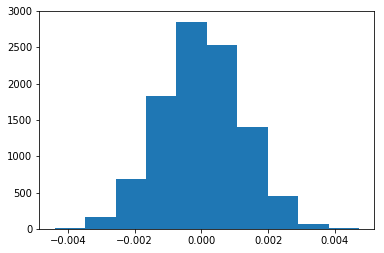

In [28]:
plt.hist(p_diffs)

j.  **p_diffs**列表的数值中，有多少比例的数值会大于 **ab_data.csv** 中观察到的实际**转化率差异** ？

In [29]:
p=df2.query('landing_page == "new_page"')['converted'].mean() - df2.query('landing_page == "old_page"')['converted'].mean()
p

-0.0015782389853555567

In [30]:
p_diffs1 = np.array(p_diffs)
(p_diffs1>p).mean() 

0.90429999999999999

k. 用文字解释一下你刚才在 **j.** 中计算出来的结果。在数据研究中，这个值是什么？ 根据这个数值，请判断新旧页面的转化率是否有显著差异。


这个值为p值为90.77%大于第一类错误的阈值5%。因此，不能拒绝零假设，即旧页面转化率大于或者等于新页面。

l. 我们也可以使用一个内置程序 （built-in）来实现类似的结果。使用内置程序可能很容易就能取得结果，但上面的内容仍然很重要，它可以训练你具有正确的数据统计思维。填写下面的内容来计算每个页面的转化次数，以及收到每个页面的用户数。计算新旧页面出现的次数，也就是数据中 `n_old` 与 `n_new` 分别出现的行数。

In [31]:
import statsmodels.api as sm

convert_old = df2.query('landing_page == "old_page"')['converted'].sum()
convert_new = df2.query('landing_page == "new_page"')['converted'].sum()
n_old = (df2['landing_page'] == 'old_page').sum()
n_new = (df2['landing_page'] == 'new_page').sum()


/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


m. 现在使用 `stats.proportions_ztest` 来计算你的 z-score (什么是 [z-score](https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/z-scores/a/z-scores-review)) 与 p-value。[这里](http://knowledgetack.com/python/statsmodels/proportions_ztest/) 的资料可以提供额外信息。

In [32]:
z_score, p_value = sm.stats.proportions_ztest([convert_old,convert_new], [n_old,n_new],alternative = 'smaller')
z_score, p_value

(1.3109241984234394, 0.90505831275902449)

n. 根据上面算出的 z-score 和 p-value，你认为新旧页面的转化率是否有区别？它们与 **j.** 与 **k.** 问题中的结果一致吗？

有区别,p值为0.9051大于5%和z得分为1.131小于1.65都得出不能拒绝零假设，即旧页面转化率大于等于新页面，和j与k的问题结果一致。

<a id='regression'></a>
### III - 回归分析法之一

`1.` 在最后一部分中，你会看到，你在之前的A / B测试中获得的结果也可以通过执行回归来获取。<br><br>

a. 既然每行的值是转化或不转化，那么在这种情况下，我们应该执行哪种类型的回归？


逻辑回归

b. 目标是使用 **statsmodels** 来拟合你在 **a.** 中指定的回归模型，以查看用户收到的不同页面是否存在显著的转化差异。但是，首先，你需要为这个截距创建一个列（ 原文：column） ，并为每个用户收到的页面创建一个虚拟变量列。添加一个 **截距** 列，一个 **ab_page** 列，当用户接收 **treatment** 时为1， **control** 时为0。

In [33]:
df2['c'] = 1
df2['ab_page'] = pd.get_dummies(df2['group'])['treatment']
df2.head()

,user_id,timestamp,group,landing_page,converted,c,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0
5,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0
7,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0



c. 使用 **statsmodels** 导入你的回归模型。 实例化该模型，并使用你在 **b.** 中创建的2个列来拟合该模型，用来预测一个用户是否会发生转化。

In [34]:
mod = sm.Logit(df2.converted,df2[['c','ab_page']])
result = mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. 请在下方提供你的模型摘要，并根据需要使用它来回答下面的问题。

In [35]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Wed, 06 Mar 2019   Pseudo R-squ.:               8.077e-06
Time:                        15:53:18   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c             -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. 与 **ab_page** 关联的 p-值是多少？ 为什么它与你在 **II** 中发现的结果不同？<br><br> 

p值为0.19，比II中的结果小，因为这里零假设是**$p_{old}$** = **$p_{new}$** ，备择假设为**$p_{old}$** ≠ **$p_{new}$** 关注p值得正负两侧，采用的是双侧检验，而Part II中零假设是**$p_{old}$** ≧ **$p_{new}$** ，备择假设为**$p_{old}$** < **$p_{new}$** 只关注一侧p值，为单侧检验，所以p值较小。



f. 现在，你一定在考虑其他可能影响用户是否发生转化的因素。讨论为什么考虑将其他因素添加到回归模型中是一个不错的主意。在回归模型中添加附加项有什么弊端吗？

决定结果的因素往往不止一个，多考虑几个因素能得出更全面的结论。但在回归模型中添加附加项也有弊端：1.添加附加项之间可能存在相关性。2.添加附加项越多出现错误数据也就越多。3.添加项可能和结果并不为线性关系不适应与回归模型。4.附加项的取值范围可能不同，这会导致置信区间和 p 值不准确。

g. 现在，除了测试不同页面的转化率是否会发生变化之外，还要根据用户居住的国家或地区添加一个 effect 项。你需要导入 **countries.csv** 数据集，并将数据集合并在适当的行上。
这个国家项对转化有影响吗？

In [36]:
df3 = pd.read_csv('countries.csv')
df3=df2.merge(df3,on='user_id')

In [37]:
df3.head()

,user_id,timestamp,group,landing_page,converted,c,ab_page,country
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US


In [38]:
df3.isnull().sum()

user_id         0
timestamp       0
group           0
landing_page    0
converted       0
c               0
ab_page         0
country         0
dtype: int64

In [39]:
df3[['CA','UK','US']]=pd.get_dummies(df3['country'])
df3.sample(5)

,user_id,timestamp,group,landing_page,converted,c,ab_page,country,CA,UK,US
113357,830227,2017-01-13 09:39:32.271648,control,old_page,0,1,0,UK,0,1,0
232372,758073,2017-01-06 07:57:06.379361,treatment,new_page,0,1,1,UK,0,1,0
110207,885102,2017-01-20 09:55:46.325167,control,old_page,0,1,0,US,0,0,1
254618,719215,2017-01-15 02:26:15.689420,treatment,new_page,0,1,1,US,0,0,1
263169,830409,2017-01-09 18:55:24.246176,treatment,new_page,0,1,1,US,0,0,1


In [40]:
mod2 = sm.Logit(df3.converted,df3[['c','ab_page','UK','CA']])
result2 = mod2.fit()
result2.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Wed, 06 Mar 2019   Pseudo R-squ.:               2.323e-05
Time:                        15:53:19   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c             -1.9893      0.009   -223.763      0.000      -2.007      -1.972
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
UK             0.0099      0.013      0.743      0.457      -0.016       0.036
CA            -0.0408      0.027     -1.516      0.130      -0.093       0.012
==============================================================================
"""

从UK和CA的p值发布为0.457、0.13均大于5%，即为非统计学显著，页面转化率和国家关系不大。

h. 虽然你现在已经查看了国家与页面在转化率上的个体性因素，但现在我们要查看页面与国家/地区之间的相互作用，测试其是否会对转化产生重大影响。创建必要的附加列，并拟合一个新的模型。  

In [41]:
df3['new_CA'] = df3['ab_page'] * df3['CA']
df3['new_UK'] = df3['ab_page'] * df3['UK']

In [42]:
df3.head()

,user_id,timestamp,group,landing_page,converted,c,ab_page,country,CA,UK,US,new_CA,new_UK
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0,US,0,0,1,0,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0,US,0,0,1,0,0
2,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0,US,0,0,1,0,0
3,936923,2017-01-10 15:20:49.083499,control,old_page,0,1,0,US,0,0,1,0,0
4,719014,2017-01-17 01:48:29.539573,control,old_page,0,1,0,US,0,0,1,0,0


In [43]:
mod3 = sm.Logit(df3.converted,df3[['c','ab_page','CA','new_CA','UK','new_UK']])
result3 = mod3.fit()
result3.summary()

Optimization terminated successfully.
         Current function value: 0.366109
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290578
Method:                           MLE   Df Model:                            5
Date:                Wed, 06 Mar 2019   Pseudo R-squ.:               3.482e-05
Time:                        15:53:20   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
                                        LLR p-value:                    0.1920
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
c             -1.9865      0.010   -206.344      0.000      -2.005      -1.968
ab_page       -0.0206      0.014     -1.505      0.132      -0.047       0.006
CA            -0.0175      0.038     -0.465      0.642      -0.091       0.056
new_CA        -0.0469      0.054     -0.872      0.383      -0.152       0.059
UK            -0.0057      0.019     -0.306      0.760      -0.043       0.031
new_UK         0.0314      0.027      1.181      0.238      -0.021       0.084
==============================================================================
"""

从数据看出new_CA,new_USp值分布为0.383、0.238均大于5%，即为非统计学显著，也说明转化率和国家关系不大。

<a id='conclusions'></a>
## 总结

从描述统计学和推论统计学来看中可以看出旧页面的转化率要大于或等于新页面，所以不推荐更换新页面。
但这都是理论上的，实际情况更为复杂，可能会有旧页面的漏洞太多，维护成本高这样的问题。所以我们应该根据实际来情况来决定是否选择新页面，不能只看理论层面。
